In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('../datasets/wholesale_customers/Wholesale_customers_data.csv')

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = ['Fresh', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
cat_features = ['Channel', 'Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
    ]
)

X_scaled = preprocessor.fit_transform(df)

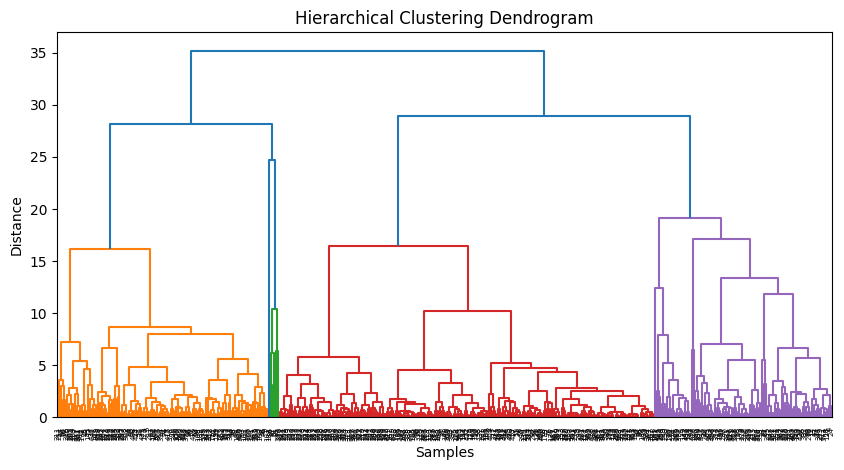

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X_scaled, method="ward")  # ward minimizes variance

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [8]:
from sklearn.cluster import KMeans

for k in [3, 4]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)


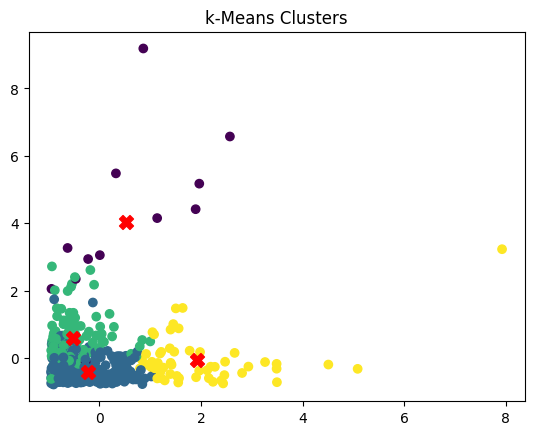

In [13]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=labels, cmap='viridis')
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 2],
    s=100, c='red', marker='X'
)
plt.title("k-Means Clusters")
plt.show()
